# **HIP Breast Cancer Screening**

|Group|Size|Breast Cancer||All Other|
|-----|----|-------------||---------|
|     |    |  No., Rate|| No., Rate|
|Treatment - Screened| 20,200     |23, 1.1     ||428, 21 |
|Treatment - Refused| 10,800     |16, 1.5     ||409, 38 |
|Treatment - Total| 31,000     |39, 1.3     ||837, 27 |
|Control - Total| 31,000     |63, 2.0     ||879, 28 |

**We perform hypothesis testing to check whether the difference in death rates between the treatment and the control group is significant enough, to establish that offering mammography reduces the risk of death from breast cancer.**

## **Importing the necessary libraries**

In [1]:
import scipy.stats as stats

import numpy as np

import matplotlib.pyplot as plt

from statsmodels.stats.proportion import proportions_ztest

import seaborn as sns

from scipy.stats import binom


## **Binomial Distribution**

**Null hypothesis $(H_0): π = 0.002$**

**Alternative hypothesis $(H_a): π < 0.002$**

* The total number of trials / observations = 31,000
* The hypothesized probability = 0.002
* The number of deaths due to breast cancer in the treatment group = 39

In [2]:
# Finding the p-value using the Binomial distribution
print("The p-value is", round(stats.binom_test(x = 39, n = 31000, p = 0.002, alternative = "less" ), 4))


The p-value is 0.0012


/var/folders/nd/z10gkxp14_vbcbgjmpzd69200000gn/T/ipykernel_19783/2057635900.py:2: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  print("The p-value is", round(stats.binom_test(x = 39, n = 31000, p = 0.002, alternative = "less" ), 4))


Since the **p-value (0.0012) is less than 0.05, we reject the null hypothesis at a 95% confidence level**. This implies that we have sufficient evidence to conclude that offering mammography reduces the risk of death from breast cancer.

Now, let's plot the **probability distribution ~ Binom( n = 31000, p = 0.002 )**

In [3]:
n = 31000

p = 0.002

k = np.arange(0, 200)

dist = [binom.pmf(i, n, p) for i in k]    # Probabilities, calculated using ~ Binom( 31000, 0.002 ), for each value of k


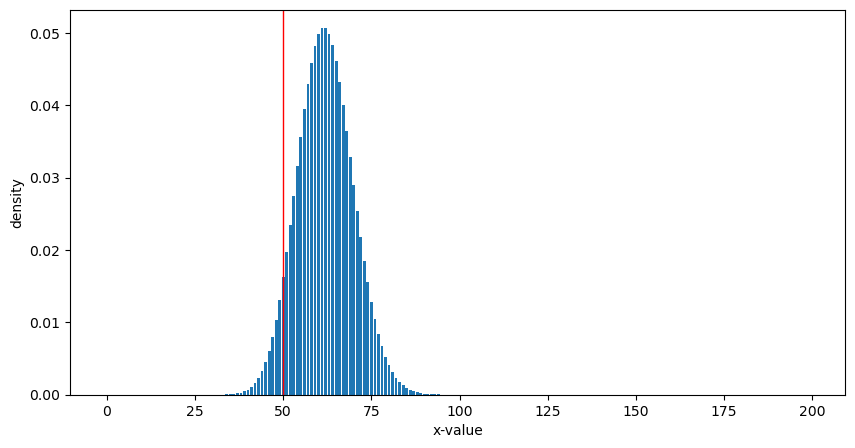

In [4]:
plt.figure(figsize = (10, 5))

plt.bar(k, dist)

plt.axvline(50, color = 'red', linestyle = '-', linewidth=1)

plt.xlabel("x-value")

plt.ylabel("density")

plt.show()


In the above plot, the **red line shows the cut-off region** for a significance level of 0.05, i.e., the area under the curve on the left side of the red line is 0.05 or 5% of the probability density under the curve. 

## **Normal Distribution**

We can also validate our result using another test, called the **proportion test**. 

A hypothesis test for a proportion is used when you are **comparing one group to a known or hypothesized population proportion value**. The **hypothesized population proportion in our case study is equal to 63/31000 = 0.002**

There is a rule stating that **if $n*p \ge 10$ and $n*(1-p) \ge 10$, then the distribution of sample proportions is approximately normal and can be estimated using the normal distribution, i.e., using the z - statistic**. 

As **the condition in the rule is satisfied for our case study**, we can use the normal distribution for the proportion test.

**Null hypothesis $(H_0): π = 63/31000 = 0.002$**

**Alternative $(H_a): π < 0.002$**

* count: The number of successes in trials / observations
* nobs: The total number of trials / observations
* value: The value of the null hypothesis (proportion)

In [5]:
stat, pvalue = proportions_ztest(count = 39, nobs = 31000, value = 0.002, alternative = "smaller")


In [6]:
print("The p-value is", pvalue)


The p-value is 0.00011423176454888235


Since the **p-value (0.00011) is less than 0.05, we reject the null hypothesis at a 95% confidence level**. This implies that we have sufficient evidence to conclude that offering mammography reduces the risk of death from breast cancer.

**Hence, we conclude that this study suggests that offering mammography is indeed helpful and can reduce the risk of death from breast cancer.**